In [2]:
# Define file paths for various input data files used in the analysis

# File containing phenotype information with associated details
phenotype_file = 'zenodo_directory/data/benchmark_datasets/opentargets_step2.for_llm.tsv'

# File containing ground truth labels for validation or comparison
ground_truth_file = 'zenodo_directory/data/benchmark_datasets/opentargets_step2.labels'

# File with precomputed embeddings for genes used in analysis
gene_embeddings_file = 'zenodo_directory/data/helper_datasets/gene_embeddings.csv'

# File with precomputed embeddings for phenotypes used in analysis
phenotype_embeddings_file = 'zenodo_directory/data/helper_datasets/phenotype_embeddings.csv'


In [3]:
# Import essential libraries for data manipulation, analysis, and statistical calculations

# Pandas for handling data structures and operations like dataframes
import pandas as pd

# Numpy for numerical operations, including arrays and mathematical functions
import numpy as np

# Hashlib for generating hash values, potentially used for unique identifiers or data integrity checks
import hashlib

# AST (Abstract Syntax Trees) module for safely evaluating expressions, such as converting string representations of lists to actual lists
import ast

# PCA from scikit-learn to reduce data dimensionality while retaining significant variance
from sklearn.decomposition import PCA

# Matplotlib for data visualization, useful for plotting graphs and PCA results
import matplotlib.pyplot as plt

# KMeans from scikit-learn to perform clustering analysis on the data
from sklearn.cluster import KMeans

# Point-biserial correlation from SciPy to measure the relationship between a binary variable and a continuous variable
from scipy.stats import pointbiserialr


In [4]:
def df_basics(df):
    # Print DataFrame information and summary statistics
    print(df.info())
    print(df.describe())
    
    # Return DataFrame (optional)
    df


In [5]:
df_ph = pd.read_csv(phenotype_file, sep='\t')


In [6]:
df_ph

,row_number,description,symbol_gene_string,ensembl_gene_string
0,1,Carotenoid and tocopherol levels (beta-caroten...,"{ATMIN},{BCO1},{C16orf46},{CDYL2},{CENPN},{CMC...","{ENSG00000103121},{ENSG00000135697},{ENSG00000..."
1,2,Bilirubin levels,"{ATG16L1},{DGKD},{HJURP},{MROH2A},{SAG},{SPP2}...","{ENSG00000072080},{ENSG00000077044},{ENSG00000..."
2,3,Bilirubin levels,"{ARHGAP4},{ATP6AP1},{AVPR2},{CTAG1A},{CTAG1B},...","{ENSG00000007350},{ENSG00000013563},{ENSG00000..."
3,4,Sphingolipid levels (SM 14:0Mol%) (sphingomyel...,"{ESR2},{GPHB5},{PPP2R5E},{RHOJ},{SGPP1},{SYNE2...","{ENSG00000054654},{ENSG00000126785},{ENSG00000..."
4,5,Fasting glucose-related traits (FPG) (D-Glucose),"{ABCB11},{CERS6},{DHRS9},{G6PC2},{LRP2},{NOSTR...","{ENSG00000073734},{ENSG00000073737},{ENSG00000..."
...,...,...,...,...
846,847,treatment with nicorandil (coronary artery dis...,"{CDKN2A},{CDKN2B},{DMRTA1},{MTAP}","{ENSG00000099810},{ENSG00000147883},{ENSG00000..."
847,848,non-toxic goitre (multinodular goiter),"{ANP32B},{CCDC180},{CORO2A},{FOXE1},{HEMGN},{N...","{ENSG00000095380},{ENSG00000095383},{ENSG00000..."
848,849,"arthrosis of hip (osteoarthritis, hip)","{ANGPTL2},{LMX1B},{MVB12B},{RALGPS1},{ZBTB34},...","{ENSG00000136828},{ENSG00000136859},{ENSG00000..."
849,850,"Blood clot in the leg, DVT (deep vein thrombosis)","{ABO},{ADAMTS13},{ADAMTSL2},{AK8},{CACFD1},{CE...","{ENSG00000123453},{ENSG00000123454},{ENSG00000..."


In [7]:
df_basics(df_ph)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   row_number           851 non-null    int64 
 1   description          851 non-null    object
 2   symbol_gene_string   851 non-null    object
 3   ensembl_gene_string  851 non-null    object
dtypes: int64(1), object(3)
memory usage: 26.7+ KB
None
       row_number
count  851.000000
mean   426.000000
std    245.806835
min      1.000000
25%    213.500000
50%    426.000000
75%    638.500000
max    851.000000


In [8]:
df_gt = pd.read_csv(ground_truth_file, sep='\t', quotechar='"')

In [9]:
df_gt

,symbol,gene
0,BCO1,ENSG00000135697
1,UGT1A8,ENSG00000242366
2,G6PD,ENSG00000160211
3,SGPP1,ENSG00000126821
4,G6PC2,ENSG00000152254
...,...,...
846,CDKN2B,ENSG00000147883
847,FOXE1,ENSG00000178919
848,LMX1B,ENSG00000136944
849,ABO,ENSG00000175164


In [10]:
df_basics(df_gt)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   symbol  851 non-null    object
 1   gene    851 non-null    object
dtypes: object(2)
memory usage: 13.4+ KB
None
       symbol             gene
count     851              851
unique    406              406
top     IL12B  ENSG00000113302
freq       33               33


In [11]:
df_gt[df_gt.duplicated()]

,symbol,gene
225,PCSK9,ENSG00000169174
226,PCSK9,ENSG00000169174
227,PCSK9,ENSG00000169174
228,PCSK9,ENSG00000169174
229,PCSK9,ENSG00000169174
...,...,...
838,WNT16,ENSG00000002745
843,GLDC,ENSG00000178445
847,FOXE1,ENSG00000178919
849,ABO,ENSG00000175164


In [12]:
# Read the phenotype embeddings data from a CSV file into a DataFrame
df_phe = pd.read_csv(phenotype_embeddings_file)

# Convert the 'embedding' column from a string representation of a list to an actual list
df_phe['embedding'] = df_phe['embedding'].apply(ast.literal_eval)


In [13]:
df_phe

,Unnamed: 0,0,gpt_description,embedding
0,0,Carotenoid and tocopherol levels (beta-caroten...,Carotenoids and tocopherols are important clas...,"[0.03543854132294655, -0.002083840314298868, -..."
1,1,Bilirubin levels,Bilirubin is a yellow pigment that is produced...,"[-0.002501995535567403, -0.03334518149495125, ..."
2,2,Sphingolipid levels (SM 14:0Mol%) (sphingomyel...,Sphingolipids are a class of lipids that play ...,"[-0.003154945094138384, -0.016002262011170387,..."
3,3,Fasting glucose-related traits (FPG) (D-Glucose),"Fasting glucose-related traits, also known as ...","[-0.026761554181575775, 0.011279185302555561, ..."
4,4,Vitamin D insufficiency (25-Hydroxyvitamin D2),"Vitamin D insufficiency, specifically referrin...","[0.004818837624043226, 0.01093713752925396, -0..."
...,...,...,...,...
954,954,Platelet forward scatter,Platelet forward scatter is a measurement used...,"[-0.029527518898248672, -0.002429093699902296,..."
955,955,Platelet large cell ratio,The platelet large cell ratio is a measure of ...,"[-0.01740766316652298, -0.02192745730280876, -..."
956,956,Diverticular disease,Diverticular disease is a common condition cha...,"[0.010556966066360474, 0.013189040124416351, -..."
957,957,Metabolite levels (cysteine-glutathione disulf...,"Metabolite levels, specifically cysteine-gluta...","[-0.01695943996310234, -0.0002931176859419793,..."


In [14]:
df_basics(df_phe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       959 non-null    int64 
 1   0                959 non-null    object
 2   gpt_description  959 non-null    object
 3   embedding        959 non-null    object
dtypes: int64(1), object(3)
memory usage: 30.1+ KB
None
       Unnamed: 0
count  959.000000
mean   479.000000
std    276.983754
min      0.000000
25%    239.500000
50%    479.000000
75%    718.500000
max    958.000000


In [15]:
df_ge = pd.read_csv(gene_embeddings_file)

In [16]:
# Convert the 'embedding' column from a string representation of a list to an actual list for gene embeddings
df_ge['embedding'] = df_ge['embedding'].apply(ast.literal_eval)
df_ge

,Unnamed: 0,0,gpt_description,embedding
0,0,ATMIN,"The ATMIN gene, also known as ATM interactor (...","[-0.01672099530696869, 0.025642508640885353, -..."
1,1,BCO1,"Gene BCO1, also known as beta-carotene oxygena...","[0.01961715891957283, -0.0013358700089156628, ..."
2,2,C16orf46,"Gene C16orf46, also known as Chromosome 16 Ope...","[-0.013213221915066242, 0.008565986528992653, ..."
3,3,CDYL2,"The gene CDYL2, also known as Chromodomain Y-l...","[-0.010155326686799526, 0.007696880027651787, ..."
4,4,CENPN,"The gene CENPN, also known as Centromere Prote...","[0.0019102469086647034, -0.01410931721329689, ..."
...,...,...,...,...
10978,186,BOLA2-SMG1P6,The gene BOLA2-SMG1P6 is a fusion gene that re...,"[0.025516435503959656, 0.024719441309571266, -..."
10979,187,SLX1B,The SLX1B gene is a member of the SLX1 family ...,"[0.021502379328012466, 0.04098100587725639, -0..."
10980,188,SULT1A4,The gene SULT1A4 encodes for the enzyme sulfot...,"[-0.028887486085295677, 0.015331678092479706, ..."
10981,189,OR9I1,Gene OR9I1 is a member of the olfactory recept...,"[-0.015196411870419979, 0.005497212056070566, ..."


In [17]:
df_basics(df_ge)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10983 entries, 0 to 10982
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       10983 non-null  int64 
 1   0                10983 non-null  object
 2   gpt_description  10983 non-null  object
 3   embedding        10983 non-null  object
dtypes: int64(1), object(3)
memory usage: 343.3+ KB
None
         Unnamed: 0
count  10983.000000
mean     940.214969
std      586.833129
min        0.000000
25%      425.000000
50%      901.000000
75%     1450.000000
max     1999.000000


In [18]:
# Print the shapes (dimensions) of the DataFrames to show the number of rows and columns for each dataset
print('phenotype', df_ph.shape)
print('ground truth', df_gt.shape)
print('phenotype embeddings', df_phe.shape)
print('gene embeddings', df_ge.shape)


phenotype (851, 4)
ground truth (851, 2)
phenotype embeddings (959, 4)
gene embeddings (10983, 4)


<span style="color: yellow;">
After converting all tables to the correct format, I noticed that the shapes of the dataframes indicate an exact match between the phenotype and ground truth tables in terms of their rows. Therefore, we should combine them. The phenotype embeddings and gene embedding files contain numerous embeddings for various traits or diseases, so we can join them using the inner join method.







</span>

In [19]:
# Concatenate the phenotype DataFrame and the ground truth DataFrame along columns (axis=1)
df_pht = pd.concat([df_ph, df_gt], axis=1)


In [20]:
df_pht

,row_number,description,symbol_gene_string,ensembl_gene_string,symbol,gene
0,1,Carotenoid and tocopherol levels (beta-caroten...,"{ATMIN},{BCO1},{C16orf46},{CDYL2},{CENPN},{CMC...","{ENSG00000103121},{ENSG00000135697},{ENSG00000...",BCO1,ENSG00000135697
1,2,Bilirubin levels,"{ATG16L1},{DGKD},{HJURP},{MROH2A},{SAG},{SPP2}...","{ENSG00000072080},{ENSG00000077044},{ENSG00000...",UGT1A8,ENSG00000242366
2,3,Bilirubin levels,"{ARHGAP4},{ATP6AP1},{AVPR2},{CTAG1A},{CTAG1B},...","{ENSG00000007350},{ENSG00000013563},{ENSG00000...",G6PD,ENSG00000160211
3,4,Sphingolipid levels (SM 14:0Mol%) (sphingomyel...,"{ESR2},{GPHB5},{PPP2R5E},{RHOJ},{SGPP1},{SYNE2...","{ENSG00000054654},{ENSG00000126785},{ENSG00000...",SGPP1,ENSG00000126821
4,5,Fasting glucose-related traits (FPG) (D-Glucose),"{ABCB11},{CERS6},{DHRS9},{G6PC2},{LRP2},{NOSTR...","{ENSG00000073734},{ENSG00000073737},{ENSG00000...",G6PC2,ENSG00000152254
...,...,...,...,...,...,...
846,847,treatment with nicorandil (coronary artery dis...,"{CDKN2A},{CDKN2B},{DMRTA1},{MTAP}","{ENSG00000099810},{ENSG00000147883},{ENSG00000...",CDKN2B,ENSG00000147883
847,848,non-toxic goitre (multinodular goiter),"{ANP32B},{CCDC180},{CORO2A},{FOXE1},{HEMGN},{N...","{ENSG00000095380},{ENSG00000095383},{ENSG00000...",FOXE1,ENSG00000178919
848,849,"arthrosis of hip (osteoarthritis, hip)","{ANGPTL2},{LMX1B},{MVB12B},{RALGPS1},{ZBTB34},...","{ENSG00000136828},{ENSG00000136859},{ENSG00000...",LMX1B,ENSG00000136944
849,850,"Blood clot in the leg, DVT (deep vein thrombosis)","{ABO},{ADAMTS13},{ADAMTSL2},{AK8},{CACFD1},{CE...","{ENSG00000123453},{ENSG00000123454},{ENSG00000...",ABO,ENSG00000175164


In [21]:
# Grouping df_ph by all columns except 'row_number' and counting unique 'symbol' and 'gene' values
df_causal_count = df_pht.groupby(df_ph.columns[df_ph.columns != 'row_number'].tolist(), as_index=False).agg(
    {
        'symbol': pd.Series.nunique,  # Count unique symbols
        'gene': pd.Series.nunique,     # Count unique genes
    }
).sort_values('gene', ascending=False)  # Sort by gene count in descending order

# Resulting DataFrame with counts of unique 'symbol' and 'gene'
df_causal_count


,description,symbol_gene_string,ensembl_gene_string,symbol,gene
481,Worrier / anxious feelings (anxiety),"{GABRA1},{GABRA6},{GABRB2},{GABRG2}","{ENSG00000022355},{ENSG00000113327},{ENSG00000...",2,2
215,Gout,"{ARL2},{ARL2-SNX15},{ATG2A},{BAD},{BATF2},{CAT...","{ENSG00000002330},{ENSG00000068831},{ENSG00000...",2,2
355,Renal underexcretion gout,"{ARL2},{ARL2-SNX15},{ATG2A},{BAD},{BATF2},{CAT...","{ENSG00000002330},{ENSG00000068831},{ENSG00000...",2,2
318,Ovarian cancer (breast carcinoma),"{ABHD8},{ANKLE1},{ANO8},{BABAM1},{BST2},{CCDC1...","{ENSG00000053501},{ENSG00000074855},{ENSG00000...",2,2
106,Breast Cancer (breast carcinoma),"{ABHD8},{ANKLE1},{ANO8},{BABAM1},{BST2},{CCDC1...","{ENSG00000053501},{ENSG00000074855},{ENSG00000...",2,2
...,...,...,...,...,...
200,FA 20:0 plasma (Arachidic acid),"{ACTL9},{ADAMTS10},{ANGPTL4},{CCL25},{CD209},{...","{ENSG00000066044},{ENSG00000076984},{ENSG00000...",1,1
201,Fasting Glucose (D-Glucose),"{AEBP1},{BLVRA},{CAMK2B},{COA1},{DBNL},{DDX56}...","{ENSG00000015520},{ENSG00000015676},{ENSG00000...",1,1
202,Fasting Glucose (D-Glucose),"{CAST},{ELL2},{GLRX},{PCSK1},{RHOBTB3}","{ENSG00000118985},{ENSG00000153113},{ENSG00000...",1,1
203,Fasting Glucose (D-Glucose),"{CDX2},{FLT1},{FLT3},{GSX1},{GTF3A},{LNX2},{MT...","{ENSG00000102755},{ENSG00000122025},{ENSG00000...",1,1


In [22]:
def check_combo_unique(df, combo_cols, unique_col):
    # Group the DataFrame by the specified combination of columns (combo_cols)
    # and calculate the number of unique values in the specified column (unique_col).
    df = df.groupby(combo_cols, as_index=False).agg(
        {
            unique_col: pd.Series.nunique  # Count unique values in the unique_col
        }
    ).sort_values(unique_col, ascending=False)  # Sort the resulting DataFrame by the unique counts in descending order

    return df  # Return the summarized DataFrame


In [23]:
result = check_combo_unique(df_pht, ['description'], 'symbol_gene_string')

# The resulting DataFrame (result) will contain counts of unique 'symbol_gene_string'
# for each unique 'description', sorted in descending order by the unique counts.


,description,symbol_gene_string
232,Type 2 diabetes (type II diabetes mellitus),49
84,Breast carcinoma,26
231,Type 2 diabetes (adjusted for BMI) (type II di...,13
127,HDL Cholesterol (high density lipoprotein chol...,12
138,Hypertension,10
...,...,...
130,Heart attack vascular/heart problems diagnosed...,1
131,Heart failure,1
133,Homoarginine levels (Homo-L-arginine),1
135,Hormone measurements (Oestradiol),1


In [24]:
check_combo_unique(df_pht, ['symbol_gene_string'], 'ensembl_gene_string')

,symbol_gene_string,ensembl_gene_string
0,"{AACS},{BRI3BP},{DHX37},{NCOR2},{RFLNA},{SCARB...",1
293,"{BLOC1S4},{C4orf50},{CRMP1},{ENSG00000170846},...",1
304,"{BRCA2},{FRY},{N4BP2L1},{N4BP2L2},{PDS5B},{ZAR1L}",1
303,"{BPNT1},{EPRS1},{IARS2},{RAB3GAP2},{SLC30A10},...",1
302,"{BNC2},{CNTLN}",1
...,...,...
145,"{AKR1A1},{CCDC163},{CCDC17},{ENSG00000288208},...",1
144,"{AKNAD1},{AMIGO1},{AMPD2},{ATXN7L2},{CELSR2},{...",1
143,"{AKAP8},{AKAP8L},{AP1M1},{CIB3},{CYP4F11},{CYP...",1
142,"{AKAP7},{ARG1},{CCN2},{CTAGE9},{ENPP1},{ENPP3}...",1


In [25]:
check_combo_unique(df_pht, ['ensembl_gene_string'], 'gene')

,ensembl_gene_string,gene
373,"{ENSG00000113273},{ENSG00000132837},{ENSG00000...",2
332,"{ENSG00000103653},{ENSG00000138621},{ENSG00000...",2
263,"{ENSG00000083857},{ENSG00000088926},{ENSG00000...",2
358,"{ENSG00000110330},{ENSG00000118113},{ENSG00000...",2
201,"{ENSG00000070193},{ENSG00000112996}",2
...,...,...
150,"{ENSG00000054267},{ENSG00000059588},{ENSG00000...",1
149,"{ENSG00000053918},{ENSG00000064201},{ENSG00000...",1
148,"{ENSG00000053918},{ENSG00000064201},{ENSG00000...",1
146,"{ENSG00000052795},{ENSG00000109756},{ENSG00000...",1


In [26]:
check_combo_unique(df_pht, ['description'], 'gene')

,description,gene
232,Type 2 diabetes (type II diabetes mellitus),27
84,Breast carcinoma,27
231,Type 2 diabetes (adjusted for BMI) (type II di...,13
127,HDL Cholesterol (high density lipoprotein chol...,12
146,LDL Cholesterol (low density lipoprotein chole...,10
...,...,...
123,Fracture of ankle (heel bone mineral density),1
124,Glutamine (L-Glutamine),1
130,Heart attack vascular/heart problems diagnosed...,1
131,Heart failure,1


<span style="color: yellow;">
Type 2 diabetes and breast carcianoma has many different causal genes then others






</span>

In [27]:
check_combo_unique(df_pht, ['description', 'ensembl_gene_string'], 'gene')

,description,ensembl_gene_string,gene
481,Worrier / anxious feelings (anxiety),"{ENSG00000022355},{ENSG00000113327},{ENSG00000...",2
215,Gout,"{ENSG00000002330},{ENSG00000068831},{ENSG00000...",2
106,Breast Cancer (breast carcinoma),"{ENSG00000053501},{ENSG00000074855},{ENSG00000...",2
318,Ovarian cancer (breast carcinoma),"{ENSG00000053501},{ENSG00000074855},{ENSG00000...",2
50,"Blood lipid (HDL, LDL, TG, PP, …) (lipid measu...","{ENSG00000116641},{ENSG00000125703},{ENSG00000...",2
...,...,...,...
200,FA 20:0 plasma (Arachidic acid),"{ENSG00000066044},{ENSG00000076984},{ENSG00000...",1
201,Fasting Glucose (D-Glucose),"{ENSG00000013293},{ENSG00000154310},{ENSG00000...",1
202,Fasting Glucose (D-Glucose),"{ENSG00000015520},{ENSG00000015676},{ENSG00000...",1
203,Fasting Glucose (D-Glucose),"{ENSG00000058866},{ENSG00000073792},{ENSG00000...",1


In [28]:
name = "nandhakumarseenivasan"
# Generate a SHA-256 hash of the name, convert to a hexadecimal string,
# then to an integer, and take modulo 10^8 to limit the size
name_hash = int(hashlib.sha256(name.encode('utf-8')).hexdigest(), 16) % (10**8)

# Print the computed hash value
print('hash value:', name_hash)

# Sample 500 random rows from the DataFrame df_pht using the hash value as a seed
df_pht_sample = df_pht.sample(500, random_state=name_hash)

df_pht_sample


hash value: 97186322


,row_number,description,symbol_gene_string,ensembl_gene_string,symbol,gene
473,474,Breast cancer (breast carcinoma),"{AKAP12},{ARMT1},{CCDC170},{ESR1},{MTHFD1L},{R...","{ENSG00000091831},{ENSG00000120254},{ENSG00000...",ESR1,ENSG00000091831
572,573,Type 2 diabetes (type II diabetes mellitus),"{APOC1},{APOC2},{APOC4},{APOC4-APOC2},{APOE},{...","{ENSG00000007047},{ENSG00000007255},{ENSG00000...",APOE,ENSG00000130203
685,686,Type 2 diabetes (type II diabetes mellitus),"{AARD},{EIF3H},{MED30},{RAD21},{SLC30A8},{UTP23}","{ENSG00000147677},{ENSG00000147679},{ENSG00000...",SLC30A8,ENSG00000164756
162,163,Blood metabolite levels (X-13431--nonanoylcarn...,"{ACADL},{CPS1},{KANSL1L},{LANCL1},{MAP2},{MYL1...","{ENSG00000021826},{ENSG00000078018},{ENSG00000...",ACADL,ENSG00000115361
90,91,LDL Cholesterol (low density lipoprotein chole...,"{AEBP1},{CAMK2B},{CCM2},{DBNL},{DDX56},{GCK},{...","{ENSG00000015520},{ENSG00000015676},{ENSG00000...",NPC1L1,ENSG00000015520
...,...,...,...,...,...,...
415,416,Asthma,"{AFF4},{CCNI2},{ENSG00000283782},{GDF9},{HSPA4...","{ENSG00000072364},{ENSG00000072682},{ENSG00000...",IL5,ENSG00000113525
645,646,Type 2 diabetes (type II diabetes mellitus),"{CAGE1},{DSP},{RIOK1},{RREB1},{SNRNP48},{SSR1}","{ENSG00000096696},{ENSG00000124782},{ENSG00000...",RREB1,ENSG00000124782
21,22,Testosterone levels (Testosterone),"{ACADVL},{ACAP1},{ALOX12B},{ALOX15B},{ALOXE3},...","{ENSG00000004975},{ENSG00000006047},{ENSG00000...",SHBG,ENSG00000129214
195,196,PC aa C32:2 (Phosphatidyl choline PC(14:0/18:2...,"{ABHD3},{ESCO1},{GATA6},{GREB1L},{MIB1},{SNRPD1}","{ENSG00000101752},{ENSG00000141446},{ENSG00000...",ABHD3,ENSG00000158201


In [29]:
# Selecting specific columns from the sampled DataFrame to create df_final
df_final = df_pht_sample[['description', 'symbol_gene_string', 'symbol', 'gene']]

# Removing curly braces from 'symbol_gene_string' and splitting the string into a list
df_final['symbol_gene_string'] = df_final['symbol_gene_string'].str.replace(r'[{}]', '', regex=True).str.split(',')

# Renaming 'symbol_gene_string' to 'symbols' for clarity
df_final.rename(columns={'symbol_gene_string': 'symbols'}, inplace=True)

# Exploding the 'symbols' column to create a new row for each symbol in the list
df_final = df_final.explode('symbols').reset_index(drop=True)

# Creating a new column 'causal' where 1 indicates a match between 'symbols' and 'symbol', and 0 otherwise
df_final['causal'] = (df_final['symbols'] == df_final['symbol']).astype(int)

# Dropping the 'symbol' and 'gene' columns as they are no longer needed
df_final.drop(['symbol', 'gene'], axis=1, inplace=True)

# Renaming 'symbols' back to 'symbol' for consistency
df_final.rename(columns={'symbols': 'symbol'}, inplace=True)

# Displaying the final DataFrame
df_final


C:\Users\Sparrow\AppData\Local\Temp\ipykernel_38792\319246915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['symbol_gene_string'] = df_final['symbol_gene_string'].str.replace(r'[{}]', '', regex=True).str.split(',')
C:\Users\Sparrow\AppData\Local\Temp\ipykernel_38792\319246915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.rename(columns={'symbol_gene_string': 'symbols'}, inplace=True)


,description,symbol,causal
0,Breast cancer (breast carcinoma),AKAP12,0
1,Breast cancer (breast carcinoma),ARMT1,0
2,Breast cancer (breast carcinoma),CCDC170,0
3,Breast cancer (breast carcinoma),ESR1,1
4,Breast cancer (breast carcinoma),MTHFD1L,0
...,...,...,...
7219,Depression (unipolar depression),PPP1R36,0
7220,Depression (unipolar depression),SGPP1,0
7221,Depression (unipolar depression),SYNE2,0
7222,Depression (unipolar depression),ZBTB1,0


In [30]:
# Merging df_final with df_phe on 'description' from df_final and the first column of df_phe (assumed to be '0')
# The merge is done using an inner join, which keeps only rows with matching keys in both DataFrames
df_merged = pd.merge(df_final, df_phe, left_on='description', right_on='0', how='inner')

# Renaming the 'embedding' column to 'phenotype_embedding' for clarity
df_merged.rename(columns={'embedding': 'phenotype_embedding'}, inplace=True)

# Selecting only the relevant columns to keep in the merged DataFrame
df_merged = df_merged[['symbol', 'phenotype_embedding', 'causal']]

# Merging the updated df_merged with df_ge on 'symbol' from df_merged and the first column of df_ge (assumed to be '0')
df_merged = pd.merge(df_merged, df_ge, left_on='symbol', right_on='0', how='inner')

# Renaming the 'embedding' column to 'gene_embedding' for clarity
df_merged.rename(columns={'embedding': 'gene_embedding'}, inplace=True)

# Selecting only the relevant columns for the final merged DataFrame
df_merged = df_merged[['phenotype_embedding', 'gene_embedding', 'causal']]

# Displaying the final merged DataFrame
df_merged


,phenotype_embedding,gene_embedding,causal
0,"[-0.020881034433841705, -0.03602464124560356, ...","[-0.011341155506670475, 0.020517021417617798, ...",0
1,"[-0.020881034433841705, -0.03602464124560356, ...","[-0.009285138919949532, 0.0372166633605957, -0...",0
2,"[-0.020881034433841705, -0.03602464124560356, ...","[-0.02641979791224003, -0.009041727520525455, ...",0
3,"[-0.020881034433841705, -0.03602464124560356, ...","[0.009661839343607426, 0.024315912276506424, -...",1
4,"[-0.020881034433841705, -0.03602464124560356, ...","[-0.02261088602244854, 0.021839916706085205, -...",0
...,...,...,...
6892,"[-0.0017749350517988205, -0.026005668565630913...","[-0.02196560613811016, 0.0352412573993206, -0....",0
6893,"[-0.0017749350517988205, -0.026005668565630913...","[-0.011303119361400604, 0.028949962928891182, ...",0
6894,"[-0.0017749350517988205, -0.026005668565630913...","[0.019096244126558304, 0.025984035804867744, -...",0
6895,"[-0.0017749350517988205, -0.026005668565630913...","[0.032110411673784256, 0.01181341614574194, -0...",0


In [49]:
def cluster(df, cluster=False, label=None, c=None):
    clusters = None  # Initialize clusters variable to None
    if cluster:
        # If clustering is requested, perform KMeans clustering with 2 clusters
        kmeans = KMeans(n_clusters=2, random_state=69)
        clusters = kmeans.fit_predict(df)  # Fit the model and predict cluster labels

    # Perform PCA to reduce the dimensionality of the data to 2 components
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(df)  # Transform the data

    print(clusters)  # Print the cluster labels if clustering was performed

    # Set up the plot with specified figure size
    plt.figure(figsize=(10, 6))
    if c is not None:
        # If color labels are provided, use them for coloring the scatter plot
        scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=c, cmap='coolwarm', label=label)
    else:
        # Otherwise, use the clusters for coloring the scatter plot
        scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='coolwarm', label=label)

    if label:
        plt.title('PCA of ' + label)  # Set the title of the plot if a label is provided

    plt.xlabel("PC1")  # Label for the x-axis
    if c is not None:
        # Create a legend if color labels are provided
        legend_labels = set(c)
        plt.legend(handles=scatter.legend_elements()[0], title="Labels", labels=legend_labels)
    elif clusters is not None:
        # Create a legend for clusters if clustering was performed
        plt.legend(handles=scatter.legend_elements()[0], title="Cluster", labels=[f"Cluster {i}" for i in range(2)])

    plt.ylabel("PC2")  # Label for the y-axis
    plt.show()  # Display the plot


In [32]:
df_merged.isnull().sum()

phenotype_embedding    0
gene_embedding         0
causal                 0
dtype: int64

In [33]:
phenotype_embeddings = np.array(df_merged['phenotype_embedding'].to_list())
gene_embeddings = np.array(df_merged['gene_embedding'].to_list())

None


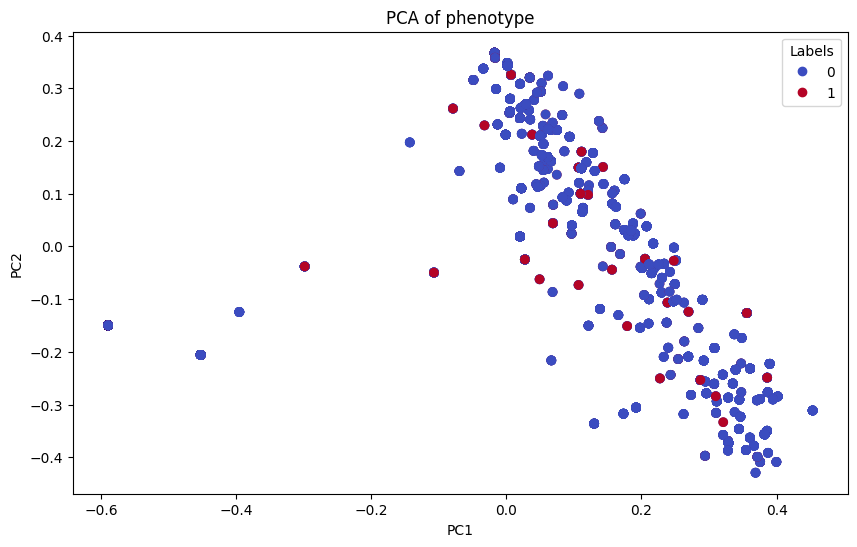

In [50]:
cluster(phenotype_embeddings, label='phenotype', c=df_merged['causal'])

<span style="color: yellow;">
Phenotype embeddings has spread across PC1. But dont have clear difference. 


</span>

None


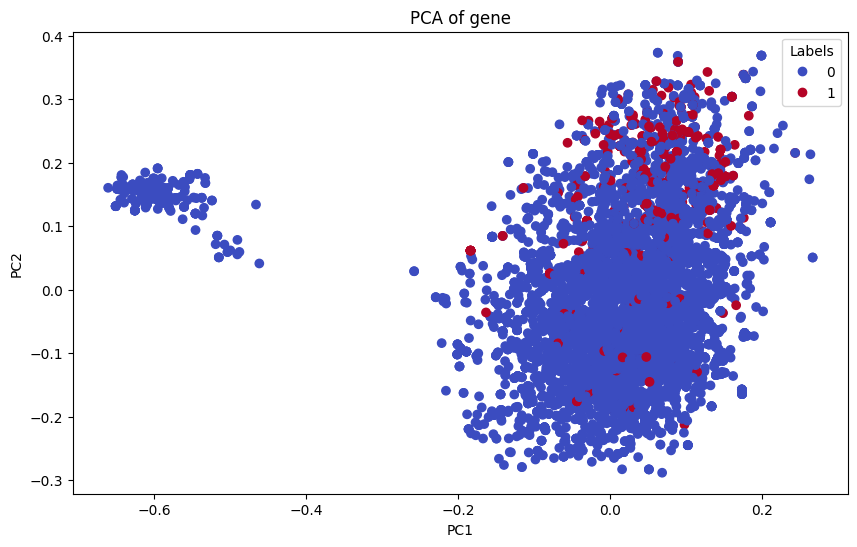

In [51]:
cluster(gene_embeddings, label='gene', c=df_merged['causal'])

<span style="color: yellow;">
Gene embeddings also has spread across PC1. But dont have clear difference. 


</span>

[0 0 0 ... 0 0 0]


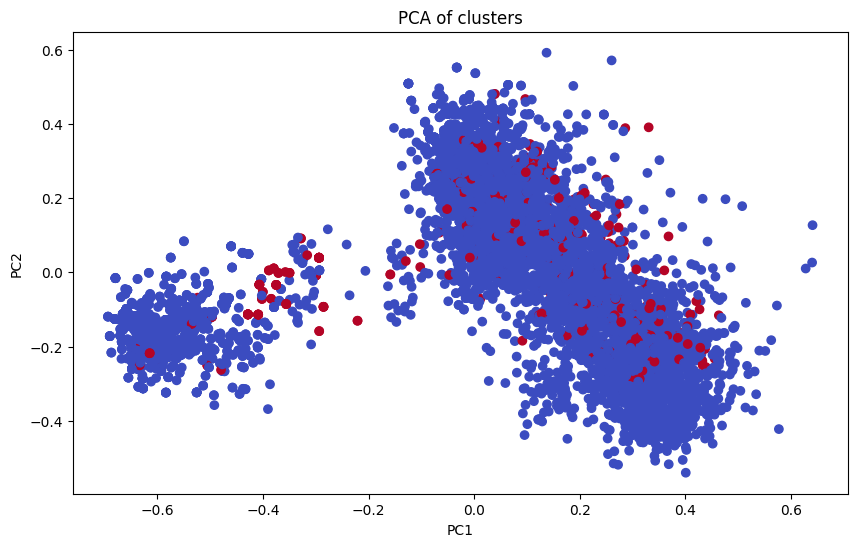

In [36]:
processed_vectors = phenotype_embeddings - gene_embeddings
cluster(processed_vectors, label='difference', cluster=True, c=df_merged['causal'])

[0 0 0 ... 0 0 0]


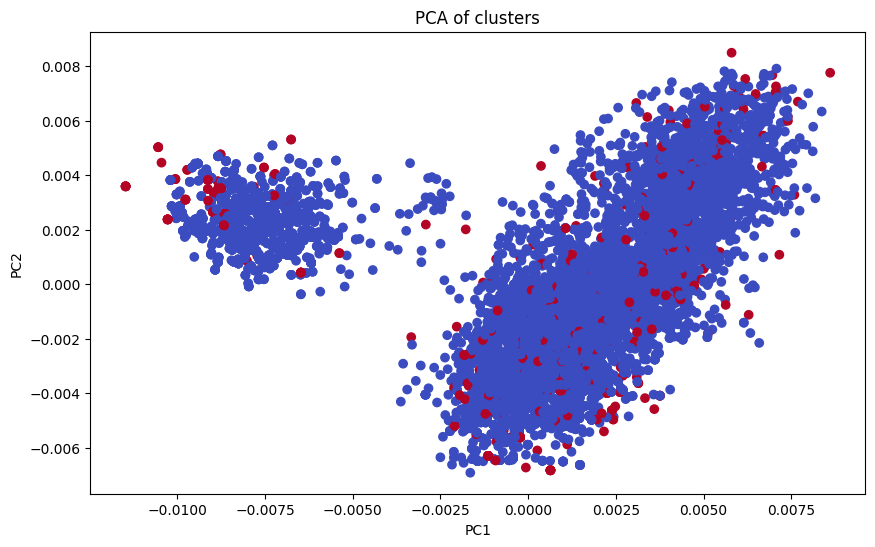

In [37]:
processed_vectors = phenotype_embeddings * gene_embeddings
cluster(processed_vectors, label='multiplication', cluster=True, c=df_merged['causal'])

In [40]:
def euclidean_distance(row):
    phenotype_array = np.array(row['phenotype_embedding'])
    gene_array = np.array(row['gene_embedding'])
    return np.linalg.norm(phenotype_array - gene_array)


df_merged['df_eud'] = df_merged.apply(lambda row: euclidean_distance(row), axis=1)

# cluster(df_eud, label='clusters', c=df_merged['causal'])

In [42]:
correlation, p_value = pointbiserialr(df_merged['df_eud'], df_merged['causal'])
print(f"Correlation coefficient: {correlation}, p-value: {p_value}")

Correlation coefficient: -0.49354305595353737, p-value: 0.0


<span style="color: yellow;">
A correlation of -0.5 indicates a strong negative correlation between Euclidean distance and causality. A p-value of 0 suggests that there is a significant relationship between the two variables.

</span>